In [1]:
import bs4
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [7]:
url='https://www.doordash.com/browse/product/reviews?business_id=335808&dd_sic=urpc_5e3c44bf-56c7-4f62-9a5e-e5abdf35def0&item_id=4310684146&ms_id=100320-5-12&store_id=1030520'
page = requests.get(url)
print(page.status_code)
soup = bs(page.content, 'html.parser')

403


In [3]:
reviews = soup.findAll('div',class_='sc-b639ab23-1 fGFsqk')
reviews

[]

In [89]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [90]:
# Download packages in the NLTK.
nltk.download(['stopwords',
               'wordnet',
               'averaged_perceptron_tagger',
               'universal_tagset',
               'tagsets',])

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [91]:
nltk.download('vader_lexicon')
df_reviews = pd.read_excel("modeloReviews.xlsx")
df_reviews.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review
0,"I'm a fan of beer, but typically bourbon is pr..."
1,The packaging design is very ergonomic. The sm...
2,"Recently decided to try this beer, and now my ..."
3,Modelo beer offers a decent option within the ...
4,As a son of a migrant from Mexico. I take prid...


In [92]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower()

In [93]:
# clean text
analyzer = SentimentIntensityAnalyzer()
df_reviews['clean_review'] = df_reviews['review'].apply(clean_text)

# Apply sentiment analysis
df_reviews['sentiment_score'] = df_reviews['clean_review'].apply(lambda review: analyzer.polarity_scores(review)['compound'])

# Categorize the reviews into positive, neutral, and negative
df_reviews['sentiment'] = df_reviews['sentiment_score'].apply(lambda score: 'negative' if score < -0.05 else 'positive' if score > 0.05 else 'neutral')

# Filter out the negative reviews
negative_reviews = df_reviews[df_reviews['sentiment'] == 'negative']['clean_review']
positive_reviews = df_reviews[df_reviews['sentiment'] == 'positive']['clean_review']

In [94]:
df_reviews

,review,clean_review,sentiment_score,sentiment
0,"I'm a fan of beer, but typically bourbon is pr...",im a fan of beer but typically bourbon is pref...,0.9851,positive
1,The packaging design is very ergonomic. The sm...,the packaging design is very ergonomic the smo...,0.8074,positive
2,"Recently decided to try this beer, and now my ...",recently decided to try this beer and now my s...,0.6808,positive
3,Modelo beer offers a decent option within the ...,modelo beer offers a decent option within the ...,0.2033,positive
4,As a son of a migrant from Mexico. I take prid...,as a son of a migrant from mexico i take pride...,0.8752,positive
...,...,...,...,...
70,"Recently decided to try this beer, and now my ...",recently decided to try this beer and now my s...,0.6808,positive
71,Taste about like a corona you can get them jus...,taste about like a corona you can get them jus...,0.8074,positive
72,I have to say I was pleasantly surprised at ho...,i have to say i was pleasantly surprised at ho...,0.8872,positive
73,As a son of a migrant from Mexico. I take prid...,as a son of a migrant from mexico i take pride...,0.8752,positive


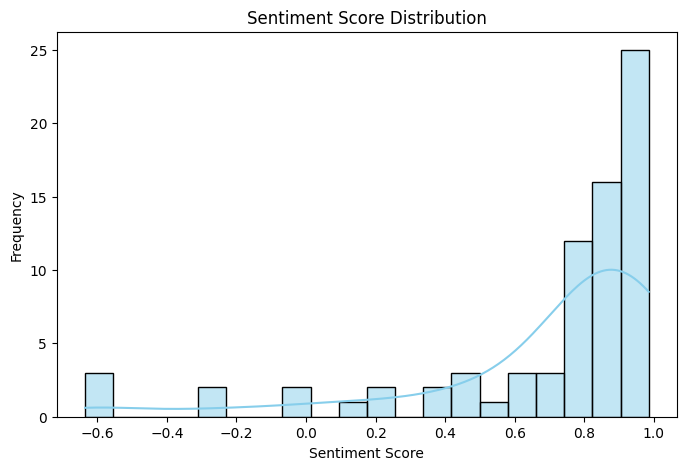

In [95]:
# Plot sentiment score distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_reviews["sentiment_score"], kde=True, bins=20, color="skyblue")
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

In [96]:
# Extract common words from negative reviews
all_words = ' '.join(negative_reviews).split()
word_count = Counter(all_words)

# Get the most common words, excluding stop words
common_complaints = [word for word, count in word_count.most_common(50) if word not in stopwords.words('english')]
common_complaints

['beer',
 'metal',
 'modelo',
 'tastes',
 'like',
 'im',
 'lately',
 'bought',
 'local',
 'grocery',
 'store',
 'tried',
 'another',
 'thinking',
 'fluke',
 'blood',
 'researched',
 'apparently',
 'process',
 'making',
 'piping',
 'degraded',
 'leeching',
 'safe',
 'human',
 'consumption',
 'due',
 'content']

In [97]:
stop_words = set(stopwords.words("english"))
filtered_list = [word for word in all_words if word.casefold() not in stop_words]

In [98]:
# Import the lemmatizer library.
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer.
lemmatizer = WordNetLemmatizer()

# Create a new list to hold the lemmed words.
lemmed_words = []

# Lemmatize each word and store it in our lemmed_words variable.
for word in filtered_list:
  lemmed_words.append(lemmatizer.lemmatize(word))

# Print the first 8 lemmatized words.
print(lemmed_words[0:8])

['lately', 'bought', 'modelo', 'local', 'grocery', 'store', 'beer', 'taste']


<Axes: xlabel='Samples', ylabel='Counts'>

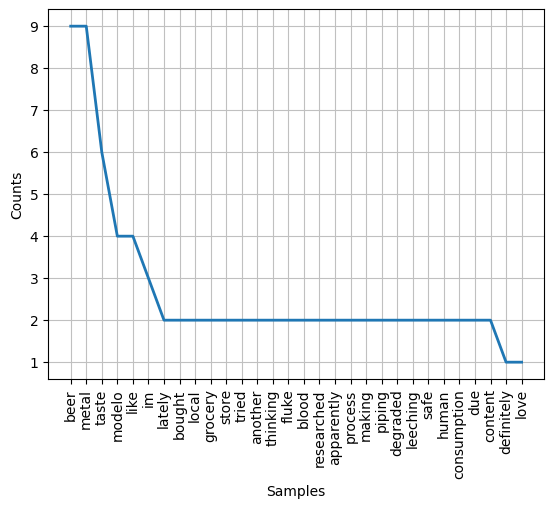

In [99]:
# Creating the word frequency distribution
freqdist = nltk.FreqDist(lemmed_words)

# Plotting the word frequency distribution
freqdist.plot(30)

Most Common Words: [('the', 17), ('beer', 9), ('metal', 9), ('i', 8), ('it', 8), ('and', 7), ('a', 5), ('its', 5), ('is', 5), ('modelo', 4)]


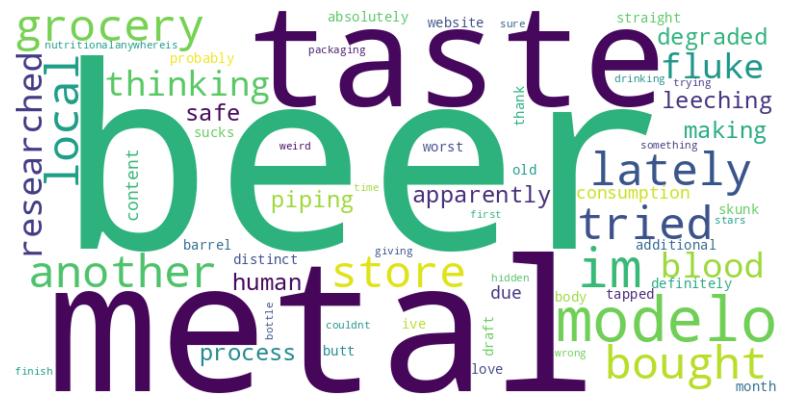

In [70]:
# Combine all reviews into one string
negative_reviews = " ".join(negative_reviews)

# Count word frequencies
word_counts = Counter(negative_reviews.split())

# Get the most common words
common_words = word_counts.most_common(10)
print("Most Common Words:", common_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Most Common Words: [('the', 156), ('a', 149), ('i', 147), ('it', 121), ('beer', 115), ('and', 107), ('is', 99), ('to', 97), ('this', 62), ('its', 60)]


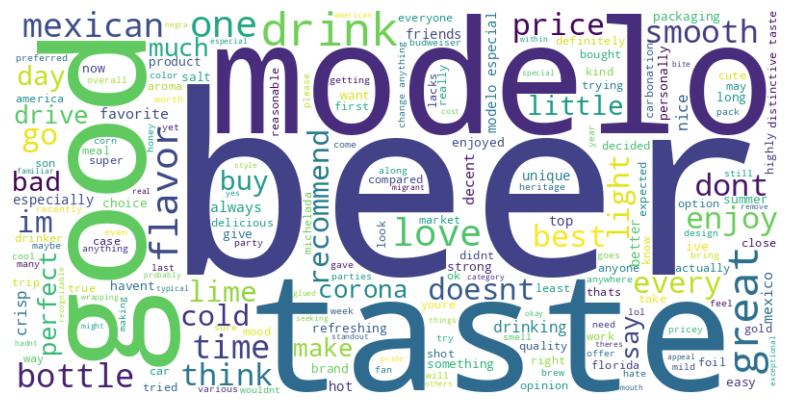

In [71]:
# Combine all reviews into one string
positive_reviews = " ".join(positive_reviews)

# Count word frequencies
word_counts = Counter(positive_reviews.split())

# Get the most common words
common_words = word_counts.most_common(10)
print("Most Common Words:", common_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()